# Test the API

There is a client for the API which you can use to predict images.
In this notebook, you can see how to use it.

## Setup Workspace

In [1]:
# Dependencies
# ------------

# standard libraries
import os
import sys
import subprocess
import requests
from pathlib import Path
from PIL import Image
from collections import namedtuple

# custom imports
sys.path.append(str(Path.cwd().parent))
from api.app.client import ImageClassifierClient


## Host the API

You first need to host the API.
In the next cell, you can check if you already built the docker image.

In [2]:
# check if the docker image exists
# define function to check
def check_docker_image():
    """Check if the docker image exists"""
    cmd = ["docker", "images", "-q", "muffin_vs_chihuahua_api"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    return bool(result.stdout.strip())

# get the result
docker_image_exists = check_docker_image()

# print message based on whether image exists
if docker_image_exists:
    print("✓ docker image 'muffin_vs_chihuahua_api' exists")
else:
    print("✗ docker image 'muffin_vs_chihuahua_api' not found")
    print("  build it with: docker build -t muffin_vs_chihuahua_api .")

✓ docker image 'muffin_vs_chihuahua_api' exists


If it does not exist, you can build it by running the following cell.

In [3]:
# if the image does not exist, it is built by running this cell
if not docker_image_exists:
    !docker build -t muffin_vs_chihuahua_api ..

Now, you can run the API in a fresh terminal from the parent directory.

1. Open a terminal
2. Navigate to the directory where the `Dockerfile` is located:
`muffin_vs_chihuahua`
3. Run the following command:

### 🔥 Hey! You **must** run this step **outside** the notebook! 🔥
#### 🔥 If you don't, run this in a terminal, the API will not be hosted and the requests will fail! 🔥

```bash
docker run -p 8000:8000 muffin_vs_chihuahua_api
```

## Setup Requests

Get your instance of the client.
It has two methods:
- `predict`: Predict an image that is already in the correct format
- `predict_user_image`: Predict any image from your computer.
It will reformat the image to the correct format if necessary.
Supports the following file formats:
    - `.jpg`
    - `.jpeg`
    - `.png`
    - `.bmp`
    - `.tiff`
    - `.webp`
    - `.gif` (first frame only)

In [4]:
# initialize client
client = ImageClassifierClient()

In [5]:
# Examples for testing
# --------------------

# data structures
Muffin = namedtuple(
    "Muffin",
    ["a", "b", "c", "d"]
)

Chihuahua = namedtuple(
    "Chihuahua",
    ["a", "b", "c", "d"]
)


# paths
DATA_DIR = Path("../data/processed/test")
MUFFINS = DATA_DIR / "muffin"
CHIHUAHUAS = DATA_DIR / "chihuahua"

# example images
muffin = Muffin(
    MUFFINS / "img_0_105.jpg",
    MUFFINS / "img_1_60.jpg",
    MUFFINS / "img_2_523.jpg",
    MUFFINS / "img_4_1017.jpg"
)
chihuahua = Chihuahua(
    CHIHUAHUAS / "img_0_18.jpg",
    CHIHUAHUAS / "img_1_144.jpg",
    CHIHUAHUAS / "img_1_428.jpg",
    CHIHUAHUAS / "img_1_176.jpg"
)

I prepared some test cases you can run without downloading any additional data.

Both `muffin` and `chihuahua` contain 4 images: `a`, `b`, `c`, and `d`, so these
are the valid examples you can use:

```python
muffin.a    chihuahua.a
muffin.b    chihuahua.b
muffin.c    chihuahua.c
muffin.d    chihuahua.d
```

You can use all of them like this by just passing the object
to the client's `predict` method.

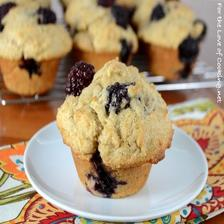

This is a muffin!
Probability: 99.9997%


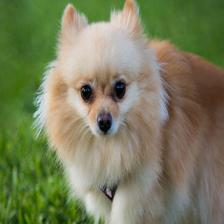

This is a chihuahua!
Probability: 99.9914%


In [6]:
# get interpreted prediction using the predict function
response_muffin = client.predict(muffin.b)
response_chihuahua = client.predict(chihuahua.d)

If you downloaded and processed the data,
you can also use all of them by just passing a path to the file to the 
predict function.

If you query the model on images from the train directory,
you are showing the model images it has already seen before.
If you want to see how the model performs on unseen images,
you should use images from the test directory.
The path to the unseen images is stored in the variable `DATA_DIR`.

In [7]:
# check if processed data is available
data_available = DATA_DIR.exists()

if data_available:
    print("✓ Processed data is available!")
    print("  You can use all of the images in the `data/processed/` folder.")
else:
    print("✗ Processed data is not available!")
    print(
        "  Please download and process according to the instructions in the "
        "README!"
    )

✓ Processed data is available!
  You can use all of the images in the `data/processed/` folder.


In case the data is available, the following cell lists all files for both
muffin and chihuahua, and makes them accessible in an object.

In [8]:
if data_available:
    
    # list all image paths and save them to an object
    muffins_all = os.listdir(DATA_DIR / "muffin")
    chihuahuas_all = os.listdir(DATA_DIR / "chihuahua")
    
    # print the paths
    print("Available images:")
    print(f"Muffin: {muffins_all}")
    print(f"Chihuahua: {chihuahuas_all}\n")
    
    # add path to the directory to all image paths
    print("Saved paths:")
    muffins_all = [DATA_DIR / "muffin" / image for image in muffins_all]
    chihuahuas_all = [DATA_DIR / "chihuahua" / image for image in chihuahuas_all]
    
    # print the paths
    print(f"Muffin: {muffins_all}")
    print(f"Chihuahua: {chihuahuas_all}")


Available images:
Muffin: ['img_4_971.jpg', 'img_2_93.jpg', 'img_2_78.jpg', 'img_1_175.jpg', 'img_0_366.jpg', 'img_0_831.jpg', 'img_2_539.jpg', 'img_4_583.jpg', 'img_1_15.jpg', 'img_0_602.jpg', 'img_4_554.jpg', 'img_3_1156.jpg', 'img_4_408.jpg', 'img_3_879.jpg', 'img_2_883.jpg', 'img_1_798.jpg', 'img_3_474.jpg', 'img_2_869.jpg', 'img_4_179.jpg', 'img_3_461.jpg', 'img_4_1126.jpg', 'img_3_449.jpg', 'img_3_1194.jpg', 'img_4_24.jpg', 'img_4_435.jpg', 'img_0_978.jpg', 'img_2_302.jpg', 'img_0_950.jpg', 'img_2_458.jpg', 'img_4_233.jpg', 'img_4_227.jpg', 'img_1_376.jpg', 'img_2_1023.jpg', 'img_4_972.jpg', 'img_4_1050.jpg', 'img_3_1237.jpg', 'img_4_782.jpg', 'img_2_923.jpg', 'img_1_638.jpg', 'img_0_403.jpg', 'img_3_1035.jpg', 'img_0_629.jpg', 'img_4_543.jpg', 'img_2_328.jpg', 'img_2_314.jpg', 'img_2_499.jpg', 'img_1_572.jpg', 'img_3_1182.jpg', 'img_4_26.jpg', 'img_2_116.jpg', 'img_2_857.jpg', 'img_1_770.jpg', 'img_4_608.jpg', 'img_2_671.jpg', 'img_3_462.jpg', 'img_4_1119.jpg', 'img_4_1131.jpg',

Provided you downloaded the data, you can now access the images by indexing
the `muffins_all` and `chihuahuas_all` objects and passing them to the
`predict()` function.

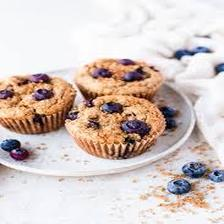

This is a muffin!
Probability: 99.9999%


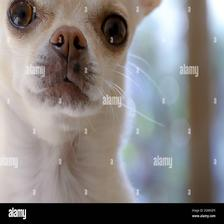

This is a chihuahua!
Probability: 99.9994%


In [9]:
if data_available:

    # predict a muffin image
    client.predict(muffins_all[13])

    # predict a chihuahua image
    client.predict(chihuahuas_all[13])

## How to query entirely unseen images

If you want to query with entirely unseen images by passing your own image,
you can do so by using the `predict_user_image` function.
The model expects the image to be a square image with a size of 224x224 pixels
and in the RGB format.
The function `predict_user_image` will check if the image is in the correct
format, reformat it if necessary, and then query the model.

### Example 1: Predicting the Original Meme

This image contains the original meme.
The model has never seen it before.
The file is already contained in the repository, but not in the correct format.

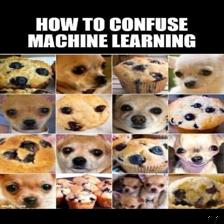

This is a muffin!
Probability: 98.1291%


In [10]:
# the original meme loaded from the images directory
ORIGINAL_MEME = Path("../images/muffin-meme2.jpg")

# predict the original meme
response_original_meme = client.predict_user_image(ORIGINAL_MEME)

Interesting!
According to the model, this is a muffin!
Also, it is pretty confident about it.
However, this is a panel image, not a single image, so it does not really
correspond to what the model has been trained on.

### Example 2: Predicting your own image

You can also just pass any image from your computer.
The function is able to handle these file formats:

- `.jpg`
- `.jpeg`
- `.png`
- `.bmp`
- `.tiff`
- `.webp`
- `.gif` (first frame only)


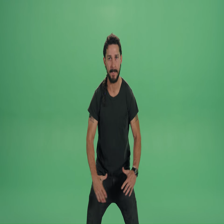

This is a chihuahua!
Probability: 97.3790%


In [11]:
# predict an image from your computer

# path to image
CUSTOM_IMAGE = Path.home() / "Pictures/memes/Shia_LaBeouf.png"

if CUSTOM_IMAGE.exists():
    # predict the image
    just_do_it = client.predict_user_image(CUSTOM_IMAGE)
else:
    print(
        "This is an image from my computer.\n"
        "You most certainly do not have it saved.\n"
        "Please adjust the path to an image you have saved on your computer."
    )


## More about the API

### Raw JSON response

If you are interested in the raw JSON response,
for example because you want to build a JavaScript frontend,
this is how you can have a look at it:

In [12]:
# display JSON response
for key, value in response_muffin.items():
    print(f"{key}: {value}")

print("\n")

for key, value in response_chihuahua.items():
    print(f"{key}: {value}")

class_name: positive
probability: 0.9999966621398926
all_probabilities: {'negative': 3.3225562674488174e-06, 'positive': 0.9999966621398926}


class_name: negative
probability: 0.9999140501022339
all_probabilities: {'negative': 0.9999140501022339, 'positive': 8.600122964708135e-05}


It contains the probabilities for both classes.
Class `positive` is the muffin, class `negative` is the chihuahua.

### Retreive the raw JSON response using requests without the client

You can also make a direct request to the API without using the client.

The client will automatically print the image and format the response.
However, there may be cases in which you are just interested in the raw JSON.
For example, if you want to build a more advanced frontend.

In Python, you can do this by using the `requests` library.
Just make a post request of the image file to the `/predict` endpoint.
The way it is set up, the `predict` endpoint is at
`http://localhost:8000/predict`.

In [13]:
# simple direct request
URL = "http://localhost:8000/predict"

# For raw JSON response
with open(muffin.a, "rb") as f:
    files = {"file": (muffin.a.name, f, "image/jpeg")}
    response = requests.post(URL, files=files)
print(response.json())

{'class_name': 'positive', 'probability': 0.9999629259109497, 'all_probabilities': {'negative': 3.7070993130328134e-05, 'positive': 0.9999629259109497}}


This way, you will get the raw JSON without any formatting or printing the
image.

### FastAPI Documentation

You can find FastAPI documentation of the API
[here](http://localhost:8000/docs)
once you host the API.